In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
wavename=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        a=str(os.path.join(dirname, filename))
        wavename.append(a)
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
wavename.pop(0)

'/kaggle/input/audio-mnist/data/audioMNIST_meta.txt'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display

In [4]:
file = open("/kaggle/input/audio-mnist/data/audioMNIST_meta.txt","r")
data=file.read()

In [5]:
print(data)

{
    "01": {
        "accent": "german", 
        "age": 30, 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Wuerzburg", 
        "recordingdate": "17-06-22-11-04-28", 
        "recordingroom": "Kino"
    }, 
    "02": {
        "accent": "German", 
        "age": "25", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Hamburg", 
        "recordingdate": "17-06-26-17-57-29", 
        "recordingroom": "Kino"
    }, 
    "03": {
        "accent": "German", 
        "age": "31", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Bremen", 
        "recordingdate": "17-06-30-17-34-51", 
        "recordingroom": "Kino"
    }, 
    "04": {
        "accent": "German", 
        "age": "23", 
        "gender": "male", 
        "native speaker": "no", 
        "origin": "Europe, Germany, Helmstedt", 
        "recordingdate": "17-06-30-18-09-14", 
        "

In [6]:
import json
datdic=json.loads(data)
print(datdic)

{'01': {'accent': 'german', 'age': 30, 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Wuerzburg', 'recordingdate': '17-06-22-11-04-28', 'recordingroom': 'Kino'}, '02': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Hamburg', 'recordingdate': '17-06-26-17-57-29', 'recordingroom': 'Kino'}, '03': {'accent': 'German', 'age': '31', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Bremen', 'recordingdate': '17-06-30-17-34-51', 'recordingroom': 'Kino'}, '04': {'accent': 'German', 'age': '23', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Helmstedt', 'recordingdate': '17-06-30-18-09-14', 'recordingroom': 'Kino'}, '05': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Hameln', 'recordingdate': '17-07-06-10-53-10', 'recordingroom': 'Kino'}, '06': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no

In [7]:
numbers = []
ages = []
genders = []

# Iterate over the dictionary and extract the values
for number, details in datdic.items():
    numbers.append(number)
    ages.append(details["age"])
    genders.append(details["gender"])


In [8]:
print(numbers)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [9]:
referdf = pd.DataFrame({"Number": numbers, "Age": ages, "Gender": genders})

In [10]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... - \ done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=fe4f35e2e8f0990f6386397be0a3fe052b2b21b7730771ab4772e8ad0dc774d0
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [11]:
!pip install soundfile 
!pip install audioread

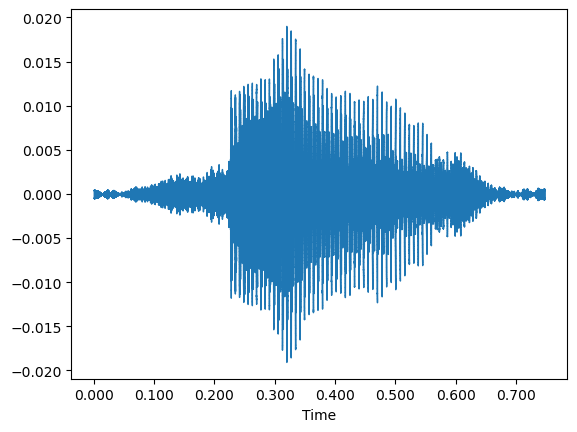

In [12]:
#testing a single audio
fpath='/kaggle/input/audio-mnist/data/01/0_01_0.wav'
data,sample_rate=librosa.load(fpath)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(fpath)



In [13]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features



The code below might take a few minutes to run

In [14]:
mf=[]
for fpath in wavename:
    a = feature_extractor(fpath)
    num = int(fpath.split('/')[-1].split('_')[0])
    mf.append([a,num])   
    print(num, end='-')

6-5-0-4-4-3-6-0-2-8-5-6-5-3-3-7-0-0-1-6-2-6-4-7-9-4-7-0-0-1-9-1-1-5-3-2-6-0-5-8-1-8-9-7-9-2-6-5-0-8-1-2-7-4-5-1-3-0-8-1-4-3-3-9-8-3-6-3-5-5-5-9-8-2-3-0-6-2-1-0-4-7-1-8-4-7-5-3-1-6-6-2-9-7-3-4-4-7-7-5-9-8-2-5-7-7-4-8-2-8-8-6-6-2-5-3-1-5-9-5-9-3-3-2-7-0-9-6-4-0-8-1-8-3-3-2-7-4-5-4-0-6-7-0-0-0-5-5-1-0-9-7-3-4-8-8-8-0-3-0-2-9-1-9-1-2-7-6-9-8-6-8-7-7-3-7-9-4-9-4-2-9-9-0-9-1-7-5-4-9-9-2-8-0-6-5-7-2-4-4-4-7-7-1-9-5-5-0-0-0-4-8-0-5-6-8-0-0-3-4-4-7-1-7-8-5-1-8-5-5-6-3-2-9-3-5-7-0-9-2-0-7-2-3-1-8-4-1-4-2-3-1-1-9-6-3-4-8-9-5-2-6-8-8-2-1-9-5-2-4-7-4-6-2-4-2-7-1-2-0-8-3-6-8-6-3-1-8-3-3-6-3-1-1-5-0-2-9-6-2-3-5-6-9-7-8-4-4-5-0-9-0-6-7-1-2-0-3-5-0-5-3-2-7-3-5-4-4-9-3-6-4-7-5-9-0-4-5-9-1-7-1-5-7-5-8-8-8-1-9-3-4-6-6-7-5-4-6-3-8-6-4-7-0-8-8-1-5-9-9-7-5-2-7-4-3-1-6-2-2-1-9-8-2-9-9-6-4-1-8-1-4-1-7-6-1-5-8-1-3-7-7-4-2-3-6-3-6-1-3-2-2-9-5-0-2-5-5-3-6-0-6-6-0-1-2-6-4-7-4-9-9-9-2-2-9-0-0-1-2-6-8-9-2-9-2-0-3-3-7-6-8-0-8-6-2-1-9-1-4-0-7-4-4-8-6-2-1-3-3-5-5-8-8-5-8-0-4-0-7-1-9-3-0-0-7-2-7-9-3-6-1-1-6-6-8-2-7-8-4-

In [15]:
#rechecking
print(wavename[1])
mf[1][1]

/kaggle/input/audio-mnist/data/47/5_47_30.wav


5

In [16]:
mnist_df=pd.DataFrame(mf,columns=['Features','Number'])
mnist_df.head()

,Features,Number
0,"[-610.77844, 0.5747652, 38.636696, 18.550526, ...",6
1,"[-587.6907, 61.90871, -5.2784634, 16.531912, 8...",5
2,"[-599.39954, 67.75347, 27.81983, 13.045481, 10...",0
3,"[-618.4858, 108.97974, 6.630151, -4.22232, -2....",4
4,"[-595.89935, 102.14142, -3.690007, 4.193048, 1...",4


In [17]:
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Features  30000 non-null  object
 1   Number    30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [19]:
X=np.array(mnist_df['Features'].tolist())
Y=np.array(mnist_df['Number'].tolist())


In [20]:
encoder=LabelEncoder()
Y=to_categorical(encoder.fit_transform(Y))

In [21]:
X[0].shape

(40,)

In [22]:
mnist_df['Number'].unique()

array([6, 5, 0, 4, 3, 2, 8, 7, 1, 9])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping


In [24]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(40,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               20992     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 189,674
Trainable params: 189,674
Non-trainable params: 0
_________________________________________________________________


In [28]:
early_stopping = EarlyStopping(monitor='accuracy', patience=10)
model.fit(X_train,Y_train,epochs=100,callbacks=[early_stopping])

Epoch 1/100
750/750 [==============================] - 5s 5ms/step - loss: 1.0692 - accuracy: 0.6601
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4608 - accuracy: 0.8283
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3501 - accuracy: 0.8716
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.2784 - accuracy: 0.8999
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2257 - accuracy: 0.9185
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1909 - accuracy: 0.9320
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1607 - accuracy: 0.9434
Epoch 8/100
750/750 [==============================] - 4s 6ms/step - loss: 0.1431 - accuracy: 0.9493
Epoch 9/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1284 - accuracy: 0.9541
Epoch 10/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1277 - accura

In [29]:
from sklearn.metrics import accuracy_score
Y_pred=model.predict(X_test)



188/188 [==============================] - 0s 2ms/step


In [30]:
Y_rpred=Y_pred.argmax(axis=1)
#testing model
print(Y_rpred[15])
print(Y_test[15])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [31]:
from tensorflow.keras.models import load_model
model.save('/kaggle/working')
#reload output direcory if not showing

Unfortunately, I am not able to record audio in Kaagle notebook so I can't integrate it with real time.
However if you are using google collab, you can go to https://colab.research.google.com/drive/1Z6VIRZ_sX314hyev3Gm5gBqvm1wQVo-a#scrollTo=RtMcXr3o6gxN for recording a wav file through microphone.